In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
DNA_encoding_scheme='atomic'

In [121]:
with  open("data/human_mouse/enhancer.cv.txt") as f:
       enhancer_cv = f.readlines()
       enhancer_cv = [s.strip() for s in enhancer_cv]
with  open("data/human_mouse/enhancer.ind.txt") as f:
       enhancer_ind = f.readlines()
       enhancer_ind = [s.strip() for s in enhancer_ind]
with  open("data/human_mouse/non.cv.txt") as f:
       non_cv = f.readlines()
       non_cv = [s.strip() for s in non_cv]
with  open("data/human_mouse/non.ind.txt") as f:
       non_ind = f.readlines()
       non_ind = [s.strip() for s in non_ind]
print(enhancer_cv)
print(enhancer_ind)

['>CHR13_99137199_99137399', 'AGGGCACTCAGGAAACCAGCTCAAGTCCTTATTGAGGTCACTGCGTCTCAAATACCCGGGCTGGGCCTGTGACTCACACACCAGCACCAACAACCAGGGGGTGGGATATTGCATCAGGAAAAGCTCCACTCTGGGTGGAACCTGCTTTTCAACCTCATTGGGTGTGTCACCGCCCAGTGGGTTCACCTTGCCCGCTGCCT', '>CHR12_14410733_14410933', 'AGAGAAAATCCAGCATGGACTTCGCAGAAAGAACTGGATTTGGCCTGGACTCGCTGGAGCCTAAAGCTGCTGCCAGTAGTGGCAAAGTCAGATGAAATATAAGGCCTGGAGCGTGGACAGTGGCCTCTTCCAGAAAGAGAAATCACACAGCACTGTCTCTGTGCCATAATCCAGTCCGCATTTTCTGTCTTGCTGCTCCT', '>CHR12_31901933_31902133', 'AATATGGTGGTTCAAAATTAGTATTTTTCCTCTTTGTAGGGGAAATCACCCAAAAGTAACAATCAGAACTGTTACCACCTGACTGGTTCTTGCCCACTGCACAGATAAAACCAAAACACTGAGCCAGCAGGAGTTGCAGCAGAGAAAGAGTTTGATTATTGCAAGGCAATAGAGTGAGGAGGACGGGATACATTTCCCAG', '>CHR12_46776533_46776733', 'TTTGTTGTGTAACCATTTGTCACTTCTACATGGATGAGGTCAACGAAATCCTCAAAGTTGCTGTCTCAGGAATAAATTTTGTTCGTGGTTGGGAAAACGAAGTGGAGAATGTTATGGGATAGAGAAAATAGCTTATTTTCTCAGTGGTTAAGTGGGAGTGGGTAAAACACAATTGGCCTTGCATGTGCTTTGTTTAAACG', '>CHR12_109085271_109085471', 'TTCTGCTGGCAGCAATTGTCAGCCTGCTTAGCACAGACTG

In [122]:
def remove_name_1(data):
    data_new = []
    for i in range(1,len(data),2):
        data_new.append(data[i])
    
    return data_new

In [123]:
def ensure_fixed_length(sequences, length=200):
    """
    Trims or pads sequences to ensure they are of the specified length.
    Args:
        sequences (list of str): List of sequences (strings of bases).
        length (int): Desired length of each sequence (default is 200).
    Returns:
        list of str: Sequences of fixed length.
    """
    fixed_length_sequences = []
    for seq in sequences:
        # Strip to length of 200
        if len(seq) > length:
            fixed_length_sequences.append(seq[:length])
        else:
            # If shorter, pad with 'N' (or other character of your choice)
            fixed_length_sequences.append(seq.ljust(length, 'N'))  # Use 'N' for padding
    return fixed_length_sequences

In [124]:
enhancer_cv = remove_name_1(enhancer_cv)
non_cv = remove_name_1(non_cv)
enhancer_ind = remove_name_1(enhancer_ind)
non_ind = remove_name_1(non_ind)



print(enhancer_cv)

enhancer_cv = ensure_fixed_length(enhancer_cv, length=200)
non_cv = ensure_fixed_length(non_cv, length=200)
enhancer_ind = ensure_fixed_length(enhancer_ind, length=200)
non_ind = ensure_fixed_length(non_ind, length=200)


print(len(enhancer_cv),len(enhancer_cv[0]))
print(len(enhancer_ind),len(enhancer_ind[0]))
print(len(non_cv),len(non_cv[0]))
print(len(non_ind),len(non_ind[0]))
train_x = np.concatenate([enhancer_cv, non_cv], axis=0)
test_x = np.concatenate([enhancer_ind, non_ind], axis=0)
print(len(train_x),len(test_x))
# print(enhancer_cv)
# print(train_x)

['AGGGCACTCAGGAAACCAGCTCAAGTCCTTATTGAGGTCACTGCGTCTCAAATACCCGGGCTGGGCCTGTGACTCACACACCAGCACCAACAACCAGGGGGTGGGATATTGCATCAGGAAAAGCTCCACTCTGGGTGGAACCTGCTTTTCAACCTCATTGGGTGTGTCACCGCCCAGTGGGTTCACCTTGCCCGCTGCCT', 'AGAGAAAATCCAGCATGGACTTCGCAGAAAGAACTGGATTTGGCCTGGACTCGCTGGAGCCTAAAGCTGCTGCCAGTAGTGGCAAAGTCAGATGAAATATAAGGCCTGGAGCGTGGACAGTGGCCTCTTCCAGAAAGAGAAATCACACAGCACTGTCTCTGTGCCATAATCCAGTCCGCATTTTCTGTCTTGCTGCTCCT', 'AATATGGTGGTTCAAAATTAGTATTTTTCCTCTTTGTAGGGGAAATCACCCAAAAGTAACAATCAGAACTGTTACCACCTGACTGGTTCTTGCCCACTGCACAGATAAAACCAAAACACTGAGCCAGCAGGAGTTGCAGCAGAGAAAGAGTTTGATTATTGCAAGGCAATAGAGTGAGGAGGACGGGATACATTTCCCAG', 'TTTGTTGTGTAACCATTTGTCACTTCTACATGGATGAGGTCAACGAAATCCTCAAAGTTGCTGTCTCAGGAATAAATTTTGTTCGTGGTTGGGAAAACGAAGTGGAGAATGTTATGGGATAGAGAAAATAGCTTATTTTCTCAGTGGTTAAGTGGGAGTGGGTAAAACACAATTGGCCTTGCATGTGCTTTGTTTAAACG', 'TTCTGCTGGCAGCAATTGTCAGCCTGCTTAGCACAGACTGGCACGCTCCACAAACCCAGTAAAGAGTTAAACGTTCTTTGCACTTGACTCAGTGGCTTCTCTTCACCACACACTCCCAGATCCCACCATTCTCTGAGCCACCCGTGCAGCCAATCAAAGCAAAGGAAGGAAATTATCCTGGC

In [125]:
train_y = np.concatenate([np.ones((len(enhancer_cv),)), np.zeros((len(non_cv),))], axis=0)  
test_y = np.concatenate([np.ones((len(enhancer_ind),)), np.zeros((len(non_ind),))], axis=0)
print(train_y.shape,test_y.shape)
# print(train_y)
# print(test_y)

(2968,) (400,)


In [126]:
# #BFDNA Encoding 
# def encode_matrix(seq_matrix):
#     """Encodes DNA sequences using the BFDNA scheme and maps to range [0, 5) after scaling and rounding."""
#     def compute_bfdna(sequence):
#         total_length = len(sequence)
#         base_counts = {base: sequence.count(base) for base in 'ACGTN'}
#         return [base_counts[base] / total_length for base in sequence]
    
#     def scale_and_round(sequence_bfdna, scale_factor=100, max_value=5):
#         # Scale, round, and clamp to the range [0, max_value)
#         # scaled = [round(value * scale_factor) for value in sequence_bfdna]
#         return [round(value * scale_factor) for value in sequence_bfdna]
    
#     # Compute BFDNA and apply scaling and rounding
#     return [scale_and_round(compute_bfdna(sequence)) for sequence in seq_matrix]


# #numeric mapping
# def encode_matrix(seq_matrix):
#     """将字符编码为整数
#     """
#     ind_to_char = ['A','T','C','G','N']
#     char_to_ind = {char: i for i, char in enumerate(ind_to_char)}
#     return [[char_to_ind[i] for i in s] for s in seq_matrix]

# #Atomic Mapping
# def encode_matrix(seq_matrix):
#     """Encode sequence matrix using atomic numbers for each character (A, T, C, G, N)."""
#     # Define the atomic number mapping
#     char_to_atomic_number = {'A': 70, 'T': 58, 'C': 78, 'G': 66, 'N': 0}
    
#     # Convert sequences to atomic numbers
#     return [[char_to_atomic_number[i] for i in s] for s in seq_matrix]


# #EIIP Mapping
# def encode_matrix(seq_matrix):
#     """Encodes DNA sequences using the EIIP scheme with improved scaling to maintain differences."""
#     # Define the EIIP value mapping
#     char_to_eiip = {'A': 0.1260, 'C': 0.1340, 'G': 0.0806, 'T': 0.1335, 'N': 0.0}
    
#     def scale_eiip(sequence_eiip, scale_factor=100):
#         """Scale EIIP values by a factor and retain precision."""
#         return [round(value * scale_factor, 2) for value in sequence_eiip]
    
#     # Convert sequences to EIIP values and scale them
#     return [scale_eiip([char_to_eiip[i] for i in s]) for s in seq_matrix]





In [127]:
def encode_matrix(seq_matrix, encoding_scheme):
    """Encodes DNA sequences using the specified encoding scheme."""
    if encoding_scheme == 'BFDNA':
        # BFDNA Encoding
        def compute_bfdna(sequence):
            total_length = len(sequence)
            base_counts = {base: sequence.count(base) for base in 'ACGTN'}
            return [base_counts[base] / total_length for base in sequence]

        def scale_and_round(sequence_bfdna, scale_factor=100, max_value=5):
            return [round(value * scale_factor) for value in sequence_bfdna]
        
        return [scale_and_round(compute_bfdna(sequence)) for sequence in seq_matrix]

    elif encoding_scheme == 'numeric':
        # Numeric Mapping
        ind_to_char = ['A', 'T', 'C', 'G', 'N']
        char_to_ind = {char: i for i, char in enumerate(ind_to_char)}
        return [[char_to_ind[i] for i in s] for s in seq_matrix]

    elif encoding_scheme == 'atomic':
        # Atomic Mapping
        char_to_atomic_number = {'A': 70, 'T': 58, 'C': 78, 'G': 66, 'N': 0}
        return [[char_to_atomic_number[i] for i in s] for s in seq_matrix]

    elif encoding_scheme == 'EIIP':
        # EIIP Mapping
        char_to_eiip = {'A': 0.1260, 'C': 0.1340, 'G': 0.0806, 'T': 0.1335, 'N': 0.0}
        
        def scale_eiip(sequence_eiip, scale_factor=100):
            return [round(value * scale_factor, 2) for value in sequence_eiip]
        
        return [scale_eiip([char_to_eiip[i] for i in s]) for s in seq_matrix]

    else:
        raise ValueError(f"Unknown encoding scheme: {encoding_scheme}")


In [128]:
train_x = encode_matrix(train_x,encoding_scheme=DNA_encoding_scheme)
test_x = encode_matrix(test_x,encoding_scheme=DNA_encoding_scheme)
print(train_x)
train_x = np.array(train_x)
test_x = np.array(test_x)

[[70, 66, 66, 66, 78, 70, 78, 58, 78, 70, 66, 66, 70, 70, 70, 78, 78, 70, 66, 78, 58, 78, 70, 70, 66, 58, 78, 78, 58, 58, 70, 58, 58, 66, 70, 66, 66, 58, 78, 70, 78, 58, 66, 78, 66, 58, 78, 58, 78, 70, 70, 70, 58, 70, 78, 78, 78, 66, 66, 66, 78, 58, 66, 66, 66, 78, 78, 58, 66, 58, 66, 70, 78, 58, 78, 70, 78, 70, 78, 70, 78, 78, 70, 66, 78, 70, 78, 78, 70, 70, 78, 70, 70, 78, 78, 70, 66, 66, 66, 66, 66, 58, 66, 66, 66, 70, 58, 70, 58, 58, 66, 78, 70, 58, 78, 70, 66, 66, 70, 70, 70, 70, 66, 78, 58, 78, 78, 70, 78, 58, 78, 58, 66, 66, 66, 58, 66, 66, 70, 70, 78, 78, 58, 66, 78, 58, 58, 58, 58, 78, 70, 70, 78, 78, 58, 78, 70, 58, 58, 66, 66, 66, 58, 66, 58, 66, 58, 78, 70, 78, 78, 66, 78, 78, 78, 70, 66, 58, 66, 66, 66, 58, 58, 78, 70, 78, 78, 58, 58, 66, 78, 78, 78, 66, 78, 58, 66, 78, 78, 58], [70, 66, 70, 66, 70, 70, 70, 70, 58, 78, 78, 70, 66, 78, 70, 58, 66, 66, 70, 78, 58, 58, 78, 66, 78, 70, 66, 70, 70, 70, 66, 70, 70, 78, 58, 66, 66, 70, 58, 58, 58, 66, 66, 78, 78, 58, 66, 66, 70, 

In [129]:
#定义SN、SP、ACC、MCC
def sn_sp_acc_mcc(true_label,predict_label,pos_label=1):
    import math
    pos_num = np.sum(true_label==pos_label)
    print('pos_num=',pos_num)
    neg_num = true_label.shape[0]-pos_num
    print('neg_num=',neg_num)
    tp =np.sum((true_label==pos_label) & (predict_label==pos_label))
    print('tp=',tp)
    tn = np.sum(true_label==predict_label)-tp
    print('tn=',tn)
    sn = tp/pos_num
    sp = tn/neg_num
    acc = (tp+tn)/(pos_num+neg_num)
    fn = pos_num - tp
    fp = neg_num - tn
    print('fn=',fn)
    print('fp=',fp)
    
    tp = np.array(tp,dtype=np.float64)
    tn = np.array(tn,dtype=np.float64)
    fp = np.array(fp,dtype=np.float64)
    fn = np.array(fn,dtype=np.float64)
    mcc = (tp*tn-fp*fn)/(np.sqrt((tp+fn)*(tp+fp)*(tn+fp)*(tn+fn)))
    return sn,sp,acc,mcc

In [130]:
from tensorflow.keras import backend as K
from tensorflow.keras import initializers, regularizers, constraints
from tensorflow.keras.layers import Layer
#https://zhuanlan.zhihu.com/p/97525394
class Attention3d(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        """
        Keras Layer that implements an Attention mechanism for temporal data.
        Supports Masking.
        Follows the work of Raffel et al. [https://arxiv.org/abs/1512.08756]
        # Input shape
            3D tensor with shape: `(samples, steps, features)`.
        # Output shape
            2D tensor with shape: `(samples, features)`.
        :param kwargs:
        Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
        The dimensions are inferred based on the output shape of the RNN.
        Example:
            # 1
            model.add(LSTM(64, return_sequences=True))
            model.add(Attention())
            # next add a Dense layer (for classification/regression) or whatever...
            # 2
            hidden = LSTM(64, return_sequences=True)(words)
            sentence = Attention()(hidden)
            # next add a Dense layer (for classification/regression) or whatever...
        """
        #self.supports_masking = True
        

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0

        super(Attention3d, self).__init__(**kwargs)
    def get_config(self):
         config = {"W_regularizer":self.W_regularizer,
                   "b_regularizer":self.b_regularizer,"W_constraint":self.W_constraint,"b_constraint":self.b_constraint,
                    "bias":self.bias,"step_dim":self.step_dim,"features_dim":self.features_dim}
         base_config = super(Attention3d, self).get_config()
         return dict(list(base_config.items()) + list(config.items()))

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=initializers.get('glorot_uniform'),
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        e = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))  # e = K.dot(x, self.W)
        if self.bias:
            e += self.b
        e = K.tanh(e)

        a = K.exp(e)
        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())
        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)

        c = K.sum(a * x, axis=1)
        return c

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.features_dim

In [131]:
def resnet_identity_block(input_data, filters, kernel_size):
    # CNN层
    x = Conv1D(filters, kernel_size, strides=1, padding='same')(input_data)
    x = BatchNormalization()(x)  #批次标准化
    x = Activation('relu')(x)
    # 第二层没有激活函数
    x = Conv1D(filters, kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    # 两个张量相加
    x = Add()([x, input_data])
    # 对相加的结果使用ReLU激活
    x = Activation('relu')(x)
    # 返回结果
    return x

def resnet_convolutional_block(input_data, filters, kernel_size):
    # CNN层
    x = Conv1D(filters, kernel_size, strides=2, padding='valid')(input_data)
    x = BatchNormalization()(x)  #批次标准化
    x = Activation('relu')(x)
    # 第二层没有激活函数
    x = Conv1D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    X = Conv1D(filters, kernel_size, strides=2, padding='valid')(input_data)
    # 两个张量相加
    x = Add()([x, X])
    # 对相加的结果使用ReLU激活
    x = Activation('relu')(x)
    # 返回结果
    return x

In [132]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding,Dense,Flatten,Dropout,Add,Bidirectional,LSTM,Conv1D,GlobalMaxPool1D,MaxPooling1D,BatchNormalization,Activation,Reshape
import tensorflow as tf

def define_model():
    maxlen = 200
    max_features = 100
    embedding_dims = 32
    class_num = 1
    last_activation = 'sigmoid'
    input = Input((maxlen,))
    embedding = Embedding(max_features, embedding_dims, input_length=maxlen)(input)
    y = Conv1D(32, 8, strides=1, padding='same')(embedding)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = MaxPooling1D(pool_size=2, strides=1)(y)
    y = resnet_convolutional_block(y, 64, 8)   #卷积残差快  https://blog.csdn.net/qq_31050167/article/details/79161077
    y = resnet_identity_block(y, 64, 8)   #恒等残差块
    y = resnet_identity_block(y, 64, 8) 
    y = GlobalMaxPool1D()(y)

    x = Bidirectional(LSTM(32, return_sequences=True))(embedding)  # LSTM
    x = Bidirectional(LSTM(32, return_sequences=True))(x)
    x = Attention3d(maxlen)(x)
    x = Dropout(0.5)(x)

    t = tf.keras.layers.Concatenate()([x,y])
    t = Dense(16,activation='relu')(t)
    output = Dense(class_num, activation=last_activation)(t)
    model = Model(inputs=input, outputs=output)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  metrics=['accuracy'])
    return model

In [ ]:
# #training of model
# model_layer1 = define_model()

# # Training parameters
# batch_size = 32
# epochs = 50

# # Train layer 1 model
# history1 = model_layer1.fit(
#     train_x, 
#     train_y,
#     batch_size=batch_size,
#     epochs=epochs,
#     validation_split=0.2,  # Using 20% of training data for validation
#     verbose=1
# )

# # Save the trained model
# model_layer1.save_weights('Enhancer-LSTMAtt\ResNet+LSTM+Attention(EIIP).weights.h5')


In [ ]:
model_layer1.load_weights(f"/workspace/Enhancer_BiLSTMAtt-ResNet/Enhancer-LSTMAtt/ResNet+LSTM+Attention({DNA_encoding_scheme}).weights.h5")

/workspace/Enhancer_BiLSTMAtt-ResNet/Enhancer-LSTMAtt/ResNet+LSTM+Attention(atomic).weights.h5


 7/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
pos_num= 200
neg_num= 200
tp= 169
tn= 127
fn= 31
fp= 73
0.845 0.635 0.74 0.4909474476768105
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
0.852275


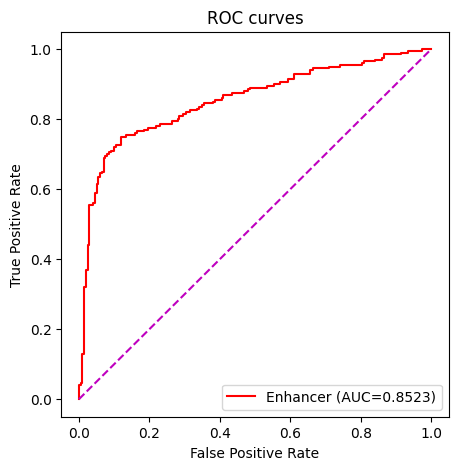

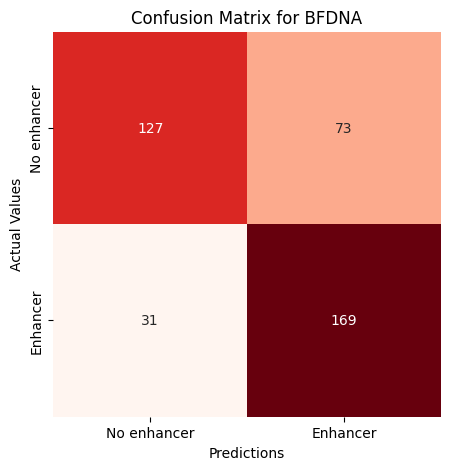

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Your existing model prediction logic
res1 = model_layer1.predict(test_x)  # Prediction
pred1 = np.squeeze(res1, axis=-1)
f1 = pred1 > 0.5
pred1[f1] = 1
pred1[pred1 < 0.6] = 0

# Call to your sn_sp_acc_mcc function (not shown in the code snippet you provided)
sn,sp,acc,mcc1 = sn_sp_acc_mcc(test_y, pred1, pos_label=1)
print(sn,sp,acc,mcc1)

# ROC curve calculations and AUC
FPR_1, TPR_1, threshold_1 = roc_curve(test_y, model_layer1.predict(test_x), pos_label=1)
AUC_1 = auc(FPR_1, TPR_1)
print(AUC_1)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.title('ROC curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot(FPR_1, TPR_1, color='r', label='Enhancer (AUC={:.4f})'.format(AUC_1))
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
plt.legend(loc='lower right')
# plt.savefig('layer1+layer2：Independent test ROC curves.png', dpi=300)
# plt.savefig('layer1+layer2：Independent test ROC curves.pdf', dpi=300)
# plt.savefig('layer1+layer2：Independent test ROC curves.jpg', dpi=300)
plt.show()

# --- Confusion Matrix Plotting ---
# Calculate confusion matrix
cm = confusion_matrix(test_y, pred1)

# Create the plot
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['No enhancer', 'Enhancer'], yticklabels=['No enhancer', 'Enhancer'])

# Add labels and title
plt.title('Confusion Matrix for BFDNA')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')

# Display the plot
plt.show()
